In [5]:
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import numpy as np

In [6]:
df = pd.read_csv("../data/sample/mimic.csv")

In [12]:
time = np.arange(625)/125
data = df['PLETH'][:625].values

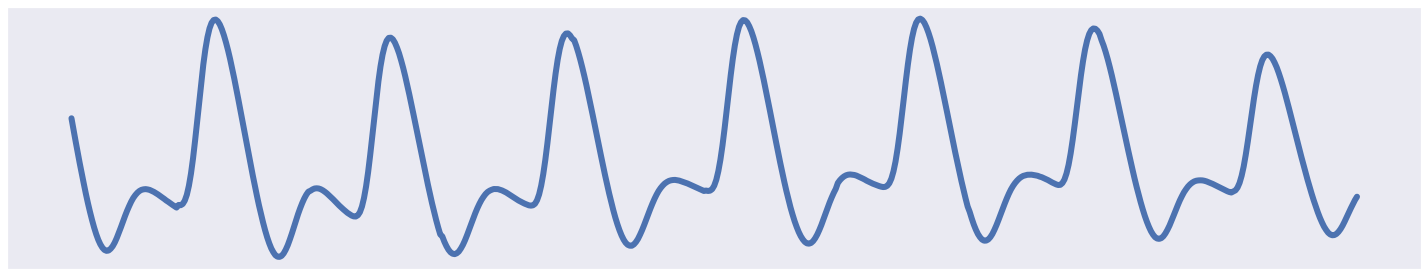

In [18]:
fig, ax = plt.subplots(figsize=(20, 4))

sns.lineplot(x=time, y=data, lw=6)
ax.set_xlabel('')
ax.set_ylabel('')

ax.set_xticks([])
ax.set_yticks([])

plt.tight_layout()
fig.savefig('presentation_examples/ppg.png', transparent=True)

In [19]:
from biosppy.signals import ecg, ppg

In [26]:
ppg.ppg_segmentation(-df['PLETH'].values, 125)

ReturnTuple(segments=array([[1267, 1732],
       [1732, 2222],
       [2222, 2783],
       [2783, 3597]]), selected_segments=array([], shape=(0, 2), dtype=int64), mean_pulse_ts=array([0.   , 0.008, 0.016, 0.024, 0.032, 0.04 , 0.048, 0.056, 0.064,
       0.072, 0.08 , 0.088, 0.096, 0.104, 0.112, 0.12 , 0.128, 0.136,
       0.144, 0.152, 0.16 , 0.168, 0.176, 0.184, 0.192, 0.2  , 0.208,
       0.216, 0.224, 0.232, 0.24 , 0.248, 0.256, 0.264, 0.272, 0.28 ,
       0.288, 0.296, 0.304, 0.312, 0.32 , 0.328, 0.336, 0.344, 0.352,
       0.36 , 0.368, 0.376, 0.384, 0.392, 0.4  , 0.408, 0.416, 0.424,
       0.432, 0.44 , 0.448, 0.456, 0.464, 0.472, 0.48 , 0.488, 0.496]), mean_pulse=array([ inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,
        inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,
        inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,
        inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,
        inf,  inf,  inf,  in

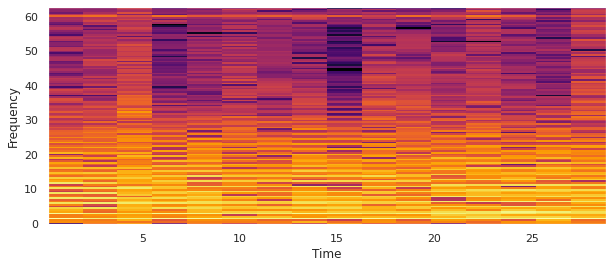

In [30]:
from scipy import signal
import matplotlib as mpl
from scipy.fft import fftshift

fig, ax = plt.subplots(figsize=(10, 4))
ax.grid(False)

f, t, Sxx = signal.spectrogram(df['V'], 125)

# pc = plt.pcolormesh(t, f, Sxx, shading='gouraud', cmap='inferno')

# plt.ylabel('Frequency [Hz]')

# plt.xlabel('Time [sec]')
# ax.grid(False)

# fig.colorbar(pc) 
# plt.show()
pc = ax.pcolormesh(t, f, Sxx, norm=mpl.colors.LogNorm(vmin=Sxx.min(), vmax=Sxx.max()), cmap='inferno') 
ax.set_ylabel('Frequency') 
ax.set_xlabel('Time')  
# fig.colorbar(pc) 
fig.savefig('presentation_examples/time_freq_analysis.png', transparent=True)

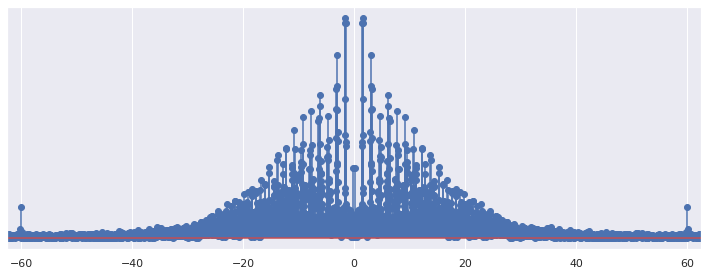

In [33]:
import scipy.fftpack as fftpack

def fft(data, fs, ax=None):
    mags = fftpack.fft(data)
    freqs = fftpack.fftfreq(len(data)) * fs

    ax.stem(freqs, np.abs(mags), use_line_collection=True)
    ax.set_xlabel('Frequency in Hertz [Hz]')
    ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
    ax.set_xlim(-fs/2, fs/2)
    return freqs, mags

fig, ax = plt.subplots(figsize=(10, 4))

fft(df['V'].values, 125, ax=ax)

ax.set_xlabel('')
ax.set_ylabel('')
# ax.set_xticks([])
ax.set_yticks([])

plt.tight_layout()
fig.savefig('presentation_examples/freq_analysis.png', transparent=True)

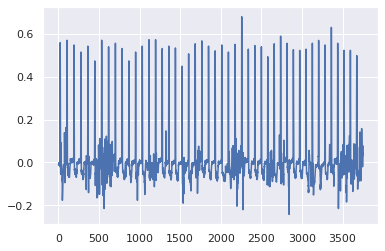

In [28]:
plt.plot(-df['V'])

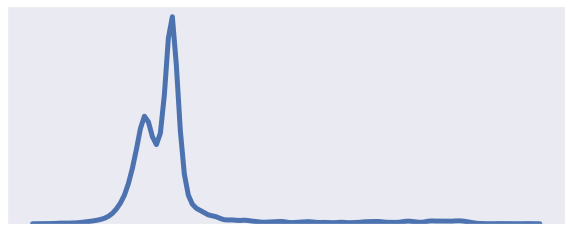

In [39]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.kdeplot(-df['V'].values, ax=ax, lw=5)

ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticks([])
ax.set_yticks([])
fig.savefig('presentation_examples/kde.png', transparent=True)